<a href="https://colab.research.google.com/github/Shuraimi/fastai_DL_course/blob/main/Lesson3_MNIST_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST basics

Reproducing the MNIST lesson3 notebook

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incom

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Under the hood training a digits classifier

In [3]:
# download and extract the MNIST data
path=untar_data(URLs.MNIST_SAMPLE)

In [4]:
# set BASE_PATH attribute of Path class to path where we downloaded the dataset for future operations
Path.BASE_PATH=path

In [5]:
#get list of directories in the path
path.ls()

(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [6]:
# check the train folder
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [7]:
(path/'train/3').ls()[0]

Path('train/3/28075.png')

In [8]:
# look at an image of seven
im_7_path=(path/'train/7').ls()[0]
img_7=Image.open(im_7_path)
img_7

In [9]:
# create variables which stores image paths of respective digits
threes=(path/'train/3').ls().sorted()
sevens=(path/'train/7').ls().sorted()

In [10]:
threes,sevens

((#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...],
 (#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...])

In [11]:
# convert image into array form and slice a specific part
arr_7=array(img_7)[10:,15:]
arr_7

array([[151, 151, 151, 253, 252, 233,  91,   0,   0,   0,   0,   0,   0],
       [  0,   0,  82, 214, 253, 224,  20,   0,   0,   0,   0,   0,   0],
       [  0,   0, 162, 253, 252, 162,   0,   0,   0,   0,   0,   0,   0],
       [  0,  31, 233, 254, 192,  41,   0,   0,   0,   0,   0,   0,   0],
       [  0, 132, 252, 253, 151,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 21, 173, 253, 203,  20,   0,   0,   0,   0,   0,   0,   0,   0],
       [142, 253, 252, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [233, 254, 233,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [252, 253, 111,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [253, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [252,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

Then view it using pandas

In [12]:
df=pd.DataFrame(arr_7)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,151,151,151,253,252,233,91,0,0,0,0,0,0
1,0,0,82,214,253,224,20,0,0,0,0,0,0
2,0,0,162,253,252,162,0,0,0,0,0,0,0
3,0,31,233,254,192,41,0,0,0,0,0,0,0
4,0,132,252,253,151,0,0,0,0,0,0,0,0
5,21,173,253,203,20,0,0,0,0,0,0,0,0
6,142,253,252,102,0,0,0,0,0,0,0,0,0
7,233,254,233,0,0,0,0,0,0,0,0,0,0
8,252,253,111,0,0,0,0,0,0,0,0,0,0
9,253,102,0,0,0,0,0,0,0,0,0,0,0


## First try- Pixel similarity

Steps involved :-
1. Convert the 3's and 7's images into tensor
2. Stack the images, convert it to float and then divide by 255

Convert images into tensor

In [13]:
threes_tensor=[tensor(Image.open(img))  for img in threes]
sevens_tensor=[tensor(Image.open(img)) for img in sevens]
len(threes_tensor),len(sevens_tensor)

(6131, 6265)

Stack all the images of respective digits

In [14]:
stacked_threes=torch.stack(threes_tensor).float()/255
stacked_sevens=torch.stack(sevens_tensor).float()/255
len(stacked_threes),len(stacked_sevens)

(6131, 6265)


Find the ideal 3 and 7

Why mean(0)?
- because it allows us to collapse the number of images(i.e index 0 of the stacked tensor) by taking average across each pixel in image while keeping the 2D shape of the image.

<Axes: >

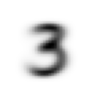

In [15]:
ideal_3=stacked_threes.mean(0)
show_image(ideal_3)

<Axes: >

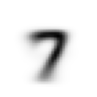

In [16]:
ideal_7=stacked_sevens.mean(0)
show_image(ideal_7)

<Axes: >

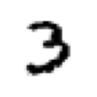

In [17]:
# sample image
a_3=stacked_threes[4]
show_image(a_3)

Now to check how far the image is from ideal 3, we calculate L1/L2 norm.

In [18]:
def L2(a,b): return (((a-b)**2).mean()).sqrt()

In [19]:
def L1(a,b): return ((a-b).abs()).mean((-1,-2))

In [20]:
L2(a_3,ideal_3)

tensor(0.2369)

In [21]:
L1(a_3, ideal_3)

tensor(0.1300)

Now we define a function to check whether an image is a 3 or not

In [22]:
def is_3(img):
    return L1(img,ideal_3)<L1(img,ideal_7)

In [23]:
is_3(a_3)

tensor(True)

Now in the same way, create validation set

In [24]:

# getting paths
valid_threes=(path/'valid/3').ls().sorted()
valid_sevens=(path/'valid/7').ls().sorted()

In [25]:

# converting to tensors
valid_3_tensors=[tensor(Image.open(o)) for o in valid_threes]
valid_7_tensors=[tensor(Image.open(o)) for o in valid_sevens]

In [26]:
# stacking the images
stacked_valid_3=torch.stack(valid_3_tensors).float()/255
stacked_valid_7=torch.stack(valid_7_tensors).float()/255

In [27]:
# calculating the distances of valid images
valid_3_dist=L1(stacked_valid_3,ideal_3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [28]:
# checking whether it's 3 or not
is_3(stacked_valid_3)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [29]:
# calculating accuracy
acc_3=is_3(stacked_valid_3).float().mean()
acc_7=1-is_3(stacked_valid_7).float().mean()
acc_3,acc_7

(tensor(0.9168), tensor(0.9854))

## Using SGD

In [30]:
# define a function
def x_2(x): return x**2

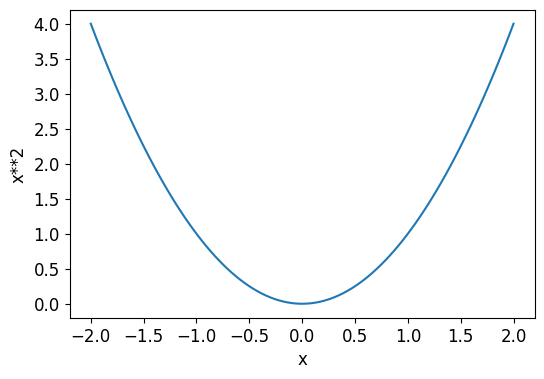

In [31]:
plot_function(x_2,'x','x**2')

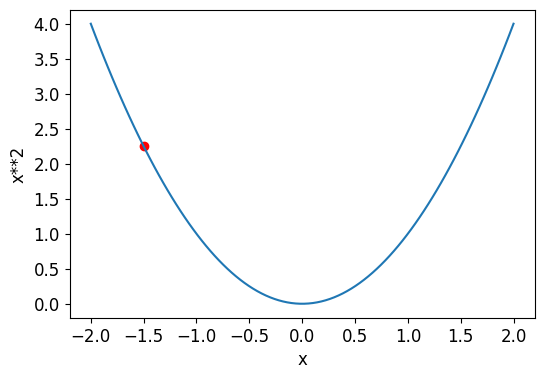

In [32]:
# plot a point on the curve
plot_function(x_2,'x','x**2')
plt.scatter(-1.5,x_2(-1.5),c='r')

Take a variable and tell PyTorch that you will require gradients and keep a track on it

In [33]:
x=tensor(4.).requires_grad_()

In [34]:
# call the function and pass x
y=x_2(x)

In [35]:
# calculate gradients
y.backward()

In [36]:
#view gradients
x.grad

tensor(8.)

In [37]:
# create a list of tensors
x=tensor([3.,5.,6.]).requires_grad_()

In [38]:
def x_2(x): return (x**2).sum()

In [39]:
y=x_2(x)
# calculate gradients
y.backward()

In [40]:
# view gradients
x.grad

tensor([ 6., 10., 12.])

In [41]:
y

tensor(70., grad_fn=<SumBackward0>)

## The MNIST loss fucntion

In [42]:
# check shape of stacked_threes
stacked_threes.shape+stacked_sevens.shape

torch.Size([6131, 28, 28, 6265, 28, 28])

In [43]:
# create train x
train_x=torch.cat([stacked_threes,stacked_sevens]).view((-1,28*28))
train_x.shape

torch.Size([12396, 784])

In [44]:
# create train labels, convert into tensor
train_y=tensor([1]*len(stacked_threes)+[0]*len(stacked_sevens)).unsqueeze(1)
train_y.shape


torch.Size([12396, 1])

In [45]:
# create dataset
dset=list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [46]:
# create a validation set
valid_x=torch.cat([stacked_valid_3,stacked_valid_7]).view((-1,28*28))
valid_y=tensor([1]*len(stacked_valid_3)+[0]*len(stacked_valid_7)).unsqueeze(1)
valid_x.shape,valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [47]:
# create valid dset
valid_dset=list(zip(valid_x,valid_y))

In [48]:
# step1 - initialise parameters
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()

In [49]:
# initialise weights
weights=init_params((28*28,1))

In [50]:
# initilaise bias
bias=init_params(1)
bias.shape

torch.Size([1])

In [51]:
train_x[0].shape,weights.shape

(torch.Size([784]), torch.Size([784, 1]))

In [52]:
# calculte predictions on sample train_x
(train_x[0]*weights.T).sum()+bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [53]:
# we then create a function to calculate predictions on all of train_x
def linear1(xb):
    return xb@weights+bias

In [54]:
preds=linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [55]:
# checking which predictions were predicted correctly
corrects=(preds>0.0)==train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [56]:
# convert into float and then take their mean in order to get the accuracy
corrects.float().mean().item()

0.5379961133003235

In [57]:
# make slight updation and tell PyTorch not to track these changes
with torch.no_grad(): weights[0]*=1.0001

In [58]:
# calculating predictions
preds=linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [59]:
# check predictions correct
((preds>0.0)==train_y).float().mean().item()

0.5379961133003235

The accuracy didn't change

In [60]:
#create targets and preds to see increase in accuracy
trgts=tensor([1,0,1])
preds=tensor([0.8,0.5,0.2])

In [61]:
# defining loss function using torch.where
def mnist_loss(predictions,targets):
    return torch.where(targets==1,1-predictions,predictions).mean()

In [62]:
mnist_loss(preds,trgts)

tensor(0.5000)

In [63]:
trgts=tensor([1,0,1])
preds=tensor([0.8,0.5,0.9])

In [64]:
mnist_loss(preds,trgts)

tensor(0.2667)

### Sigmoid

In [65]:
# we apply sigmoid to the predictions to output them to range 0-1
# so loss function is updated
def mnist_loss(predictions,targets):
    preds=predictions.sigmoid()
    return torch.where(targets==1,1-preds,preds).mean()

### SGD and mini-batches

In [66]:
coll=range(20)
dl=DataLoader(coll,batch_size=4,shuffle=True)
list(dl)

[tensor([ 7, 17,  5,  9]),
 tensor([15, 19, 11, 10]),
 tensor([13,  2, 12,  0]),
 tensor([18, 16,  3,  1]),
 tensor([ 4,  6, 14,  8])]

## Putting it all together

In [67]:
# step 1 - randomnly initialise parameters
weights=init_params((28*28,1))
bias=init_params(1)

In [68]:
# had forgotten this
dl=DataLoader(dset,batch_size=256)
xb,yb=first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [69]:
# forgot this also
valid_dl=DataLoader(valid_dset,batch_size=256)

In [70]:
# take 4 samples as batch
batch=train_x[:4]

In [71]:
# get predictions on the batch
preds=linear1(batch)
preds

tensor([[15.7077],
        [18.6850],
        [16.2143],
        [17.4726]], grad_fn=<AddBackward0>)

In [72]:
# calculate loss
loss=mnist_loss(preds,train_y[:4])
loss

tensor(5.9605e-08, grad_fn=<MeanBackward0>)

In [73]:
# now calculate gradients and see grads of weights and bias
loss.backward()


In [74]:
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-8.5305e-09), tensor([-5.9605e-08]))

In [75]:
# function to calculate gradients
def calc_gradient(xb,yb,model):
    preds=model(xb)
    loss=mnist_loss(preds,yb)
    loss.backward()


In [76]:
# use the above function
calc_gradient(train_x[:4],train_y[:4],linear1)

In [77]:
weights.grad.mean(),bias.grad

(tensor(-1.7061e-08), tensor([-1.1921e-07]))

when we call the above cell twice, gradients get added up. So we need to set them to zero.

In [78]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [79]:
# function for train epoch
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_gradient(xb,yb,model)
        for p in params:
            p.data-=p.grad.data*lr
            p.grad.zero_()


In [80]:
# we get preds wic match the target
(preds>0.0).float()==train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [81]:
# we define function to calculate batch_accuracy
def batch_accuracy(xb,yb):
    preds=xb.sigmoid()
    corrects=(preds>0.5)==yb
    return corrects.float().mean()

In [82]:
batch_accuracy(linear1(batch),train_y[:4])

tensor(1.)

In [83]:
# validate epoch
def validate_epoch(model):
    accs=[batch_accuracy(model(valid_xb),valid_yb) for valid_xb,valid_yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [84]:
validate_epoch(linear1)

0.5516

In [85]:
lr=1.
params=weights,bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.7074

In [86]:
# 20 epochs
for i in range(20):
    train_epoch(linear1,lr,params)
    print(validate_epoch(linear1),end=' ')

0.8544 0.9076 0.9315 0.9452 0.9545 0.9574 0.9633 0.9652 0.9667 0.9682 0.9692 0.9701 0.9711 0.9716 0.9726 0.9736 0.9736 0.975 0.9755 0.9755 

### Craeting an Optimizer

In [87]:
linear_model=nn.Linear(28*28,1)

In [88]:
#getting model parameters
w,b=linear_model.parameters()

In [89]:
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [90]:
# create an optimizer
class BasicOptim:
    def __init__(self,params,lr):
        self.params=list(params)
        self.lr=lr
    def step(self,*args,**kwargs):
        for p in self.params:
            p.data-=p.grad.data*self.lr

    def zero_grad(self,*args,**kwargs):
        for p in self.params:
            p.grad=None


In [91]:
# create an opt instance
opt=BasicOptim(linear_model.parameters(),lr)

In [92]:
#train epoch gets slighlty modified
def train_epoch(model):
    for xb,yb in dl:
        calc_gradient(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [93]:
# validate epoch reamins same
validate_epoch(linear_model)

0.5199

In [94]:
# define a function which includes train_epoch and validate_epoch
def train_model(model,epochs):
    for epoch in range(epochs):
        train_epoch(model)
        print(validate_epoch(model),end=' ')

In [95]:
train_model(linear_model,30)

0.4932 0.7612 0.8618 0.9175 0.9351 0.9502 0.9565 0.9638 0.9658 0.9678 0.9697 0.9717 0.9736 0.9751 0.9756 0.977 0.9775 0.9775 0.9785 0.9785 0.979 0.979 0.9795 0.9795 0.9795 0.98 0.98 0.98 0.9809 0.9814 

In [96]:
# using the SGD from fastai
linear_model=nn.Linear(28*28,1)
opt=SGD(linear_model.parameters(),lr)
train_model(linear_model,30)

0.4932 0.8232 0.8457 0.9116 0.9346 0.9472 0.956 0.9629 0.9663 0.9678 0.9692 0.9712 0.9736 0.9751 0.9761 0.977 0.9775 0.978 0.9785 0.9785 0.979 0.979 0.979 0.9795 0.9795 0.9795 0.98 0.9804 0.9804 0.9814 

In [97]:
# create a DataLoaders object
dls=DataLoaders(dl,valid_dl)

In [98]:
learn=Learner(dls,nn.Linear(28*28,1),opt_func=SGD,metrics=batch_accuracy,loss_func=mnist_loss)

In [99]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636943,0.503635,0.495584,00:00
1,0.584645,0.131199,0.911678,00:00
2,0.211909,0.216454,0.797841,00:00
3,0.091560,0.115545,0.903337,00:00
4,0.047210,0.081941,0.930815,00:00
5,0.029983,0.064714,0.946516,00:00
6,0.022961,0.054218,0.954858,00:00
7,0.019894,0.047324,0.960746,00:00
8,0.018379,0.042531,0.964671,00:00
9,0.017494,0.039028,0.966634,00:00


## Adding a non-linearity

In [101]:
# creating a simple NN simple definition
def simple_nn(xb):
    res=xb@w1+b1
    res=res.max(tensor(0.0))
    res=xb@w2+b2
    return res

In [100]:
# initialise params
w1=init_params((28*28,30))
b1=init_params(30)
w2=init_params((30,1))
b2=init_params(1)

In [104]:
# using Sequential to define simple nn
simple_net=nn.Sequential(
nn.Linear(28*28,30),
nn.ReLU(),
nn.Linear(30,1))

In [105]:
# define a learner
learn=Learner(dls,simple_net,opt_func=SGD,metrics=batch_accuracy,loss_func=mnist_loss)

In [106]:
# fit learner
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.279079,0.417539,0.504416,00:00
1,0.135194,0.223625,0.808145,00:00
2,0.076809,0.114794,0.916094,00:00
3,0.051699,0.078002,0.939647,00:00
4,0.039854,0.061038,0.956820,00:00
5,0.033680,0.051507,0.961236,00:00
6,0.030062,0.045514,0.965653,00:00
7,0.027674,0.041414,0.965653,00:00
8,0.025932,0.038426,0.968597,00:00
9,0.024574,0.036131,0.970069,00:00


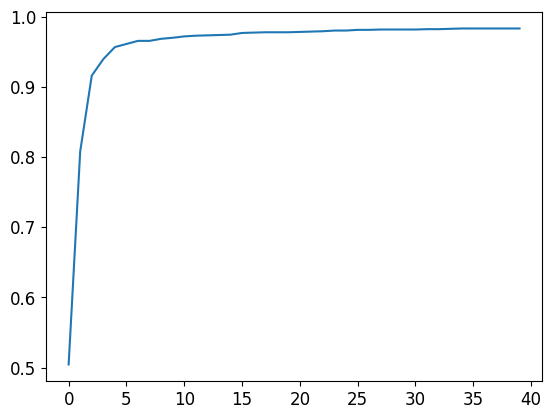

In [107]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [110]:
learn.recorder.values[-1][2]

0.9931305050849915

### Going deeper- using vision_learner

In [109]:
dls=ImageDataLoaders.from_folder(path)
learn=vision_learner(dls,resnet18, loss_func=F.cross_entropy,metrics=accuracy,pretrained=False)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.094749,0.023833,0.993131,03:44


Done 👍✅✅👍✅✅